In [76]:
import matplotlib.pyplot as plt 
import numpy as np
import random 
from mpl_toolkits import mplot3d
import pandas as pd

# Updated Code

In [118]:
FRAME_RATE = 1000
# rounding to the number of decimal places below 
# TODO: Transformation based on industry standards later
RESOLUTION = 2

# Constants - let t range from 0 to 10 seconds
TIME_T = np.arange(0, 6, 1/FRAME_RATE)

# "variability" of the overall curve
# K is big, but sample in a way such that the sequences 
# should taper off to 0 (sample with mean 0 and standard deviation 1/k^2)
K = 100

def decreasingSeqGen(p,k):
    """
    Input: Lower limit and higher limit (int)
    Output: List of length K with random values between low and high
    """
    decreasingSeq = []
    for i in range(k):
        # mean = a, var = b^2
        decreasingSeq.append(np.random.normal(0, 1/(np.power(i+1, p))))
    return decreasingSeq

def genTrigFun(a_k, b_k):
    """
    Input: Two sequences of length K
    Output: Trig function f(t) with coefficients corresponding to sequences a_k, b_k
    """
    def fun_t (t):
        sum = 0
        for i in range(K):
            sum += a_k[i]*np.sin(i*t) + b_k[i]*np.cos(i*t)
        return sum
    return (fun_t)

def speed(x_t, y_t):
    """
    Input: 2 arrays of length of TIME_T
    Output: 1 array of length of TIME_T representing the speed 
    """
    return np.sqrt(np.gradient(x_t)**2 + np.gradient(y_t)**2)
    
def curvature(x_t, y_t):
    """
    Input: 2 arrays of length of TIME_T
    Output: 1 array of length of TIME_T representing the curvature
    """
    # TODO: USE DETERMINANT TO SCALE UP EASIER
    
    num = abs(np.gradient(x_t)*np.gradient(np.gradient(y_t))
             - np.gradient(y_t)*np.gradient(np.gradient(x_t)))
    denom = speed(x_t, y_t) ** 3
    return (num/denom)

def genericPlotAgainstTime(f_t, x_t, y_t):
    plt.plot(TIME_T, f_t(x_t(TIME_T), y_t(TIME_T)))

def plotParametric (x_t, y_t):
    """ 
    Input: 2 functions of t, x(t) and y(t)
    Output: Plots x(t) against y(t). Does not return value.
    """
    plt.plot(x_t(TIME_T), y_t(TIME_T))

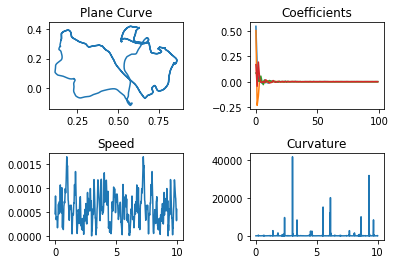

,X,Y,SPEED,CURVATURE
0,0.150726,0.329404,0.000468,11.851680
1,0.150882,0.329845,0.000469,18.673811
2,0.151034,0.330290,0.000471,27.144283
3,0.151180,0.330739,0.000474,30.381168
4,0.151322,0.331193,0.000478,33.183085
...,...,...,...,...
9995,0.675924,0.340244,0.000501,63.504596
9996,0.675439,0.340088,0.000517,59.071320
9997,0.674944,0.339912,0.000533,55.096147
9998,0.674440,0.339715,0.000549,38.377337


In [121]:
K = 100
FRAME_RATE = 1000
TIME_T = np.arange(0, 10, 1/FRAME_RATE)

# Coefficients - 1 x K
a_k = decreasingSeqGen(2, K)
b_k = decreasingSeqGen(2, K)
c_k = decreasingSeqGen(2, K)
d_k = decreasingSeqGen(2, K)

x_fun = genTrigFun(a_k, b_k)
y_fun = genTrigFun(c_k, d_k)

# Coordinates - 1 x len(TIME_T)
x = x_fun(TIME_T)
y = y_fun(TIME_T)

# Speed and curvature - 1 x len(TIME_T)
spd = speed(x, y)
crv = curvature(x, y)

# Plots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
plt.subplot(221)
plotParametric(genTrigFun(a_k, b_k), genTrigFun(c_k, d_k))
plt.title("Plane Curve")

plt.subplot(222)
kSeq = np.arange(0, K, 1)
plt.plot(kSeq, a_k)
plt.plot(kSeq, b_k)
plt.plot(kSeq, c_k)
plt.plot(kSeq, d_k)
plt.title("Coefficients")

plt.subplot(223)
plt.plot(TIME_T, spd)
plt.title("Speed")


plt.subplot(224)
plt.plot(TIME_T, crv)
plt.title("Curvature")
plt.show()

# Transform data into dataframe
df_t = pd.DataFrame((x, y, spd, crv))
df = df_t.transpose()
df.columns = ['X', 'Y', 'SPEED', 'CURVATURE']
df
# df.describe()